In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./vtabusdata.csv")
display(df)
df['date'] = pd.to_datetime(df['date'])
df.rename(columns = {'date':'DateTime'}, inplace = True)
df.info()

,date,op_type,op_id,coach,block,start_mile,end_mile,start_per,end_per,start_range,end_range,start_mpge,end_mpge,mpp
0,2019-04-08,NaN,NaN,coach_7505,block_7774,0,126.8,100,34,203,62,23.4,23.4,NaN
1,2019-04-09,NaN,NaN,coach_7505,block_7774,0,127,100,35,206,62,23.4,23.4,NaN
2,2019-04-09,NaN,NaN,coach_7504,block_7773,0,84,100,58,207,112,23.8,23.6,NaN
3,2019-04-10,NaN,NaN,coach_7505,block_7774,0,128,100,37,206,66,23.4,23,2.03
4,2019-04-10,NaN,NaN,coach_7504,block_7772,0,81,100,58,208,127,23.6,23.6,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,2020-12-31,GRP473,Opr_2,coach_7504,block_7771,48,18%,79%,61%,157,122,25.2,25.2,1.71
2048,2020-12-31,GRP376,Opr_3,coach_7504,block_7771,86,36%,61%,25%,122,42,25.2,25.2,1.62
2049,2020-12-31,NaN,Avg,coach_7501,block_7072,0,90%,100%,10%,180,11,21.8,21.8,2.15
2050,2020-12-31,XB156,Opr_8,coach_7501,block_7072,0,37%,100%,63%,180,105,21.8,21.8,2.02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     2052 non-null   datetime64[ns]
 1   op_type      1152 non-null   object        
 2   op_id        1867 non-null   object        
 3   coach        2048 non-null   object        
 4   block        2050 non-null   object        
 5   start_mile   2048 non-null   object        
 6   end_mile     2022 non-null   object        
 7   start_per    2048 non-null   object        
 8   end_per      2023 non-null   object        
 9   start_range  2048 non-null   object        
 10  end_range    2023 non-null   object        
 11  start_mpge   2048 non-null   object        
 12  end_mpge     2023 non-null   object        
 13  mpp          2004 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 224.6+ KB


In [3]:
oneBus = df.loc[df['coach'] == "coach_7505"]
oneBus
oneBus.drop(oneBus[(oneBus['op_id'] == 'Avg')].index, inplace=True)
oneBus.to_csv('oneBus.csv')

C:\Users\garre\AppData\Local\Temp\ipykernel_17412\3145260935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneBus.drop(oneBus[(oneBus['op_id'] == 'Avg')].index, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     319 non-null    object 
 1   coach        319 non-null    object 
 2   block        319 non-null    object 
 3   start_mile   319 non-null    int64  
 4   end_mile     318 non-null    object 
 5   start_per    319 non-null    object 
 6   end_per      318 non-null    object 
 7   start_range  319 non-null    int64  
 8   end_range    318 non-null    float64
 9   start_mpge   319 non-null    float64
 10  end_mpge     318 non-null    float64
 11  mpp          319 non-null    float64
 12  Odo          319 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 32.5+ KB


0.19230134326192486

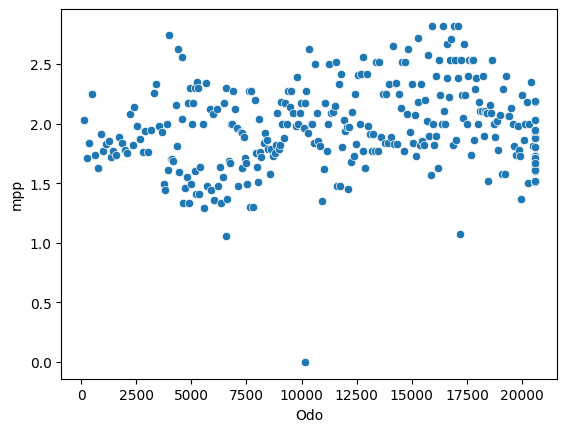

In [8]:
busData = pd.read_csv("./oneBus - oneBus.csv")
busData.info()
sns.scatterplot(x='Odo', y='mpp', data=busData)

In [15]:
busData.mpp.corr(busData.Odo)
#mean = busData.mpp.mean()
#mean

0.19230134326192486

In [42]:
df2 = df.loc[df['coach'] == "coach_7505"]
#df2.info()
#df2

finaldf = df2.groupby(['DateTime']).agg({'mpp': ['mean']})
finaldf.info()
#finaldf.to_csv('vtaonebusdata.csv')
#finaldf['date'] =  pd.to_datetime(finaldf['date'])
finaldf

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2019-04-08 to 2020-12-30
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (mpp, mean)  162 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


,mpp
,mean
DateTime,
2019-04-08,NaN
2019-04-09,NaN
2019-04-10,2.0300
2019-04-11,1.7100
2019-04-12,1.8400
...,...
2020-12-22,1.8900
2020-12-23,1.7875


In [29]:
odo = pd.read_csv("./Odo.csv")
display(odo)
odo['DateTime'] = pd.to_datetime(odo['DateTime'])
odo.info()

,DateTime,2605 - ODO
0,2019-04-26 00:00:00,8332.988472
1,2019-04-29 00:00:00,8415.550063
2,2019-05-01 00:00:00,8716.539583
3,2019-05-02 00:00:00,8867.364591
4,2019-05-03 00:00:00,9023.797895
...,...,...
526,2020-12-23 00:00:00,80310.378017
527,2020-12-24 00:00:00,80505.600419
528,2020-12-28 00:00:00,80732.264202
529,2020-12-29 00:00:00,80934.861385


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DateTime    531 non-null    datetime64[ns]
 1   2605 - ODO  531 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.4 KB


In [44]:
finaldf.info()
merged = finaldf.merge(odo, on='DateTime', how='inner')
merged

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2019-04-08 to 2020-12-30
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (mpp, mean)  162 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


C:\Users\garre\AppData\Local\Temp\ipykernel_11104\2852834761.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged = finaldf.merge(odo, on='DateTime', how='inner')


,DateTime,"(mpp, mean)",2605 - ODO
0,2019-04-29,1.9100,8415.550063
1,2019-05-01,1.8300,8716.539583
2,2019-05-02,1.8500,8867.364591
3,2019-05-03,1.7200,9023.797895
4,2019-05-09,1.7700,9690.802588
...,...,...,...
152,2020-12-22,1.8900,80116.159131
153,2020-12-23,1.7875,80310.378017
154,2020-12-24,1.9150,80505.600419
155,2020-12-29,1.7650,80934.861385


<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DateTime    157 non-null    datetime64[ns]
 1   MPP         153 non-null    float64       
 2   TotalMiles  157 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.9 KB


<AxesSubplot: xlabel='TotalMiles', ylabel='MPP'>

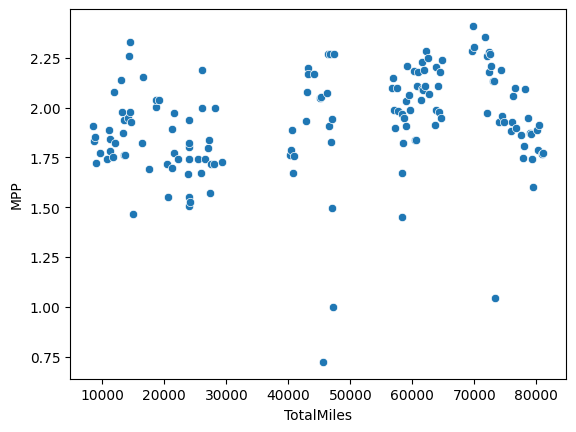

In [56]:
merged.columns = ['DateTime', 'MPP', 'TotalMiles']
merged.info()
sns.scatterplot(x='TotalMiles', y='MPP', data=merged)

In [10]:
merged.MPP.corr(merged.TotalMiles)
merged.MPP.mean()

NameError: name 'merged' is not defined